<a href="https://colab.research.google.com/github/marlagan/image_classifcation/blob/main/Fish_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fish classification with PyTorch 🐟

Importing the dataset from Kaggle

In [318]:
import kagglehub
import os

path = kagglehub.dataset_download("crowww/a-large-scale-fish-dataset")

print("Path to dataset files:", path)

os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2


['README.txt',
 'Segmentation_example_script.m',
 'NA_Fish_Dataset',
 'license.txt',
 'Fish_Dataset']

In [322]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import shutil


path_to_ds = path + '/Fish_Dataset/Fish_Dataset/'
labels = [label for label in os.listdir(path_to_ds) if 'README.txt' not in label and 'Segmentation_example_script.m' not in label and 'license.txt' not in label]
print(labels)
labels_amt = []
labels_full_amt = 0
full_path = []

for dir in labels:
  path_to_ds_cur = os.path.join(path_to_ds, dir)
  dir_list = os.listdir(path_to_ds_cur)
  for y in dir_list:
    y_path = os.path.join(path_to_ds_cur, y)
    if 'GT' not in y:
      full_path.append(path_to_ds_cur)
      amt_in_dir = len(os.listdir(y_path))
      labels_amt.append(amt_in_dir)
      labels_full_amt += amt_in_dir
    else:
      shutil.rmtree(y_path)

['Gilt-Head Bream', 'Striped Red Mullet', 'Red Mullet', 'Red Sea Bream', 'Trout', 'Shrimp', 'Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass']


## **Labels distribution**

Creating the plot to demonstrate the proportion of each label in the whole dataset

<ipython-input-119-b480fd36845f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=labels, y=labels_amt, palette='Blues')


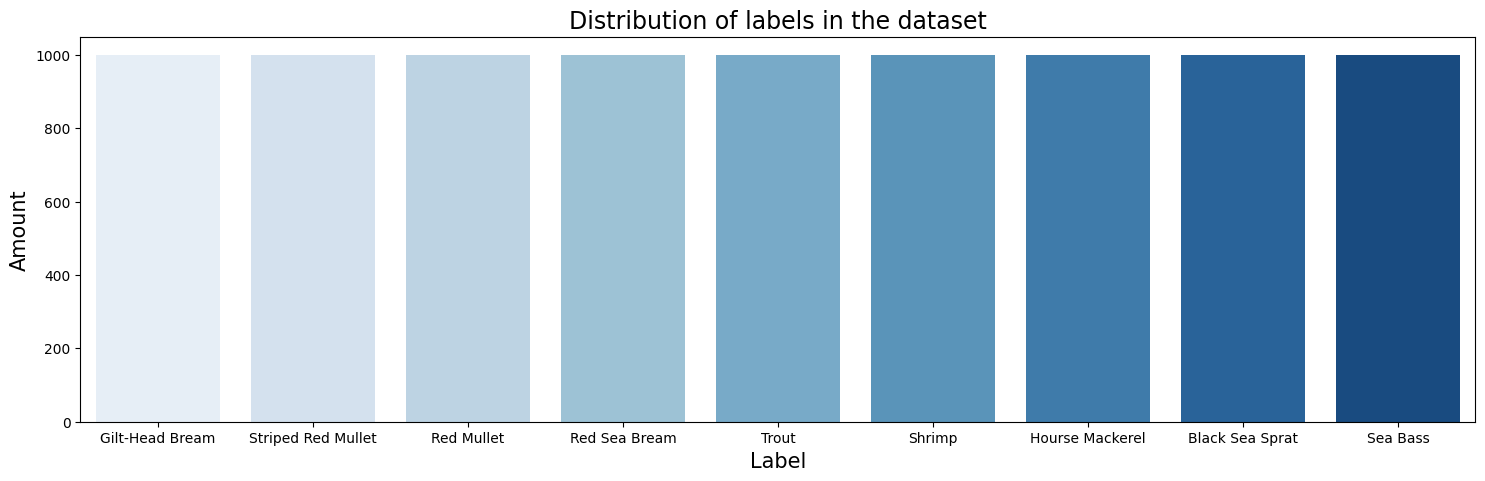

In [119]:
plt.figure(figsize=(18,5))
sb.barplot(x=labels, y=labels_amt, palette='Blues')
plt.title('Distribution of labels in the dataset', fontsize=17)
plt.xlabel('Label', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.show()

## **Colour Analysis**

Pictures used for the fish classification are in RGB and they won't be turned into greyscale. Since patterns and colours vary across different species, therefore, they have a significant impact on the model's decision-making. Three-channel(RGB) images contribute to better results. However, achieving more accurate predictions requires a larger dataset, which increases training time.

Text(0.5, 1.0, 'Blue chanel')

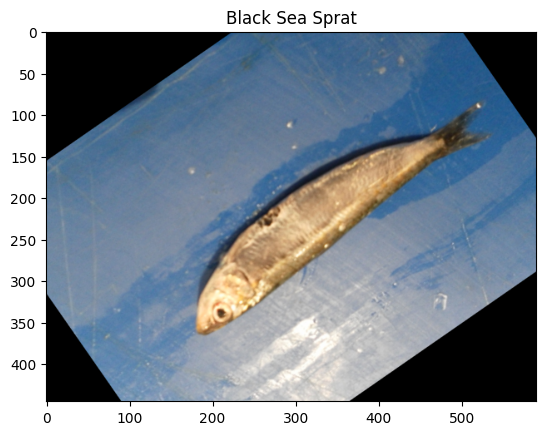

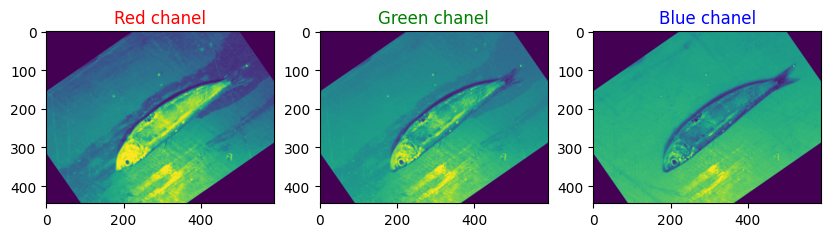

In [76]:

from PIL import Image, ImageChops, ImageEnhance

import random

fish_path = '/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png'

fish_img = Image.open(fish_path)
img = np.array(fish_img)
plt.title('Black Sea Sprat')

plt.imshow(fish_img)

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(img[:,:,0])
plt.title("Red chanel", color='r')

plt.subplot(1,3,2)
plt.imshow(img[:,:,1])
plt.title("Green chanel", color='g')

plt.subplot(1,3,3)
plt.imshow(img[:,:,2])
plt.title("Blue chanel", color='b')


## **Random image of each label**

Creating the plot to depict every label from the dataset using a random image of each label.

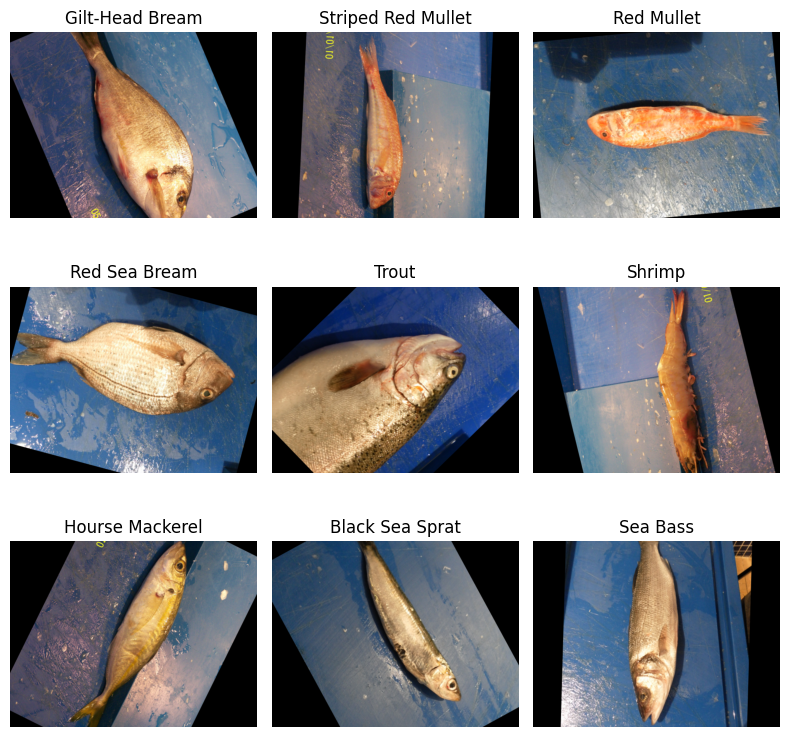

In [6]:
import random

to_predict = []

for dir in labels:
  dir = dir + '/' + dir
  cur_dir = os.path.join(path_to_ds, dir)
  files = os.listdir(cur_dir)
  random_file = random.choice(files)
  img_to_predict = os.path.join(cur_dir, random_file)
  to_predict.append(img_to_predict)

row = 3
column = 3

fig = plt.figure(figsize=(8,8))

for y in range(len(to_predict)):
    fig.add_subplot(row,column,y + 1)
    plt.title(labels[y])
    cur_img = Image.open(to_predict[y])
    plt.imshow(cur_img)
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Data processing**

Processing the data using datasets from the PyTorch library and splitting the data in an 80:20 ratio for training and testing. Datasets can be loaded into the model using the DataLoader from PyTorch.

In [398]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import random_split, ConcatDataset, DataLoader, Subset
from torchvision import transforms
from random import randint
import math

transform = transforms.Compose([
    transforms.Resize((250, 250)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
])

fish_datasets = []

dataset = datasets.ImageFolder(root='/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset', transform=transform)

subset_size = int(1800 / len(labels))
subset_elements = []
for x in range(1,10):
  random_numbers = random.sample(range((x-1)*1000, x*1000), k=subset_size)
  for n in random_numbers:
    subset_elements.append(dataset[n])

dataset = subset_elements

train_ds_size = int(len(dataset)* 0.80)

test_ds_size = int(len(dataset)) - train_ds_size

train_dataset, test_dataset = random_split(dataset, [train_ds_size, test_ds_size])

loaders = {
    'train' : DataLoader(train_dataset, batch_size = 32, shuffle=True, num_workers=0),
    'test' : DataLoader(test_dataset, batch_size = 32, shuffle=True, num_workers=0),
}



Creating a bar chart to visualise the ratio of training and testing datasets

<ipython-input-263-c44f585e47ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=data_type, y=sizes, palette='Blues')


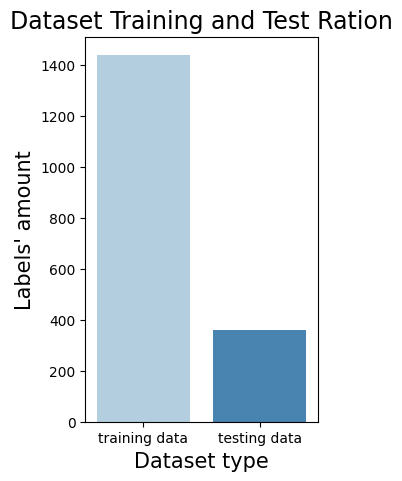

In [263]:
plt.figure(figsize=(3,5))
sizes = [train_ds_size, test_ds_size]
data_type = ['training data', 'testing data']
sb.barplot(x=data_type, y=sizes, palette='Blues')
plt.title('Dataset Training and Test Ration', fontsize=17)
plt.xlabel('Dataset type', fontsize=15)
plt.ylabel("Labels' amount", fontsize=15)
plt.show()

## **Convolutional Neural Network - Model Architecture**

In [355]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(3,10,kernel_size=3)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(10,20,kernel_size=3)
    self.conv2_drop = nn.Dropout2d(0.5)
    self.fcl1 = nn.Linear(74420, 100)
    self.fcl2 = nn.Linear(100, 9)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = x.view(x.size(0), -1)
    x = F.relu(self.fcl1(x))
    x = self.fcl2(x)
    return F.softmax(x, dim=1)

## **Optimalisation of the model**

In [399]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

optimiser = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

## **Training the model**

In [379]:
def train(epoch):
  model.train()
  positive = 0
  total = 0
  for index, (data, label) in enumerate(loaders['train']):
    data, label = data.to(device), label.to(device)
    optimiser.zero_grad()
    output = model(data)
    loss = loss_fn(output, label)
    loss.backward()
    optimiser.step()
    prediction = output.argmax(dim=1, keepdim=True)
    positive += (output.argmax(dim=1) == label).float().sum()
    total += label.size(0)

  accuracy = 100 * positive / total
  print(f'Accuracy of the model for the epoch(training): {epoch} - {round(accuracy.item(), 2)}')

  print(f'Loss(training) for the epoch {epoch} is equal to: {round(loss.item(), 2)} ')
  loss_training.append(float(loss.item()))
  accuracy_training.append(float(accuracy))

  lr.append(optimiser.param_groups[0]['lr'])

## **Testing the model**

In [380]:
def test(epoch):
  model.eval()
  loss = 0
  positive = 0
  total = 0
  with torch.no_grad():
    for data, label in loaders['test']:
      data, label = data.to(device), label.to(device)
      output = model(data)
      loss = loss_fn(output, label)
      prediction = output.argmax(dim=1, keepdim=True)
      y_test.append(label.cpu().numpy())
      predictions_test.append(prediction.cpu().numpy())
      positive += (output.argmax(dim=1) == label).float().sum()
      total += label.size(0)


  accuracy = 100 * positive / total
  print(f'Accuracy of the model for the epoch(testing): {epoch} - {round(accuracy.item(), 2)}')  # Convert to scalar before rounding

  print(f'Loss(testing) for the epoch {epoch} is equal to: {round(loss.item(), 2)} ')

  accuracy_testing.append(float(accuracy))
  loss_testing.append(float(loss.item()))


## **Training and testing**

In [381]:
loss_training = []
loss_testing = []
accuracy_training = []
accuracy_testing = []
epochs = []
y_test = []
predictions = []
predictions_test = []
positive_predictions = []
lr = []

for k in range(1, 51):

  epochs.append(k)
  print(k)
  train(k)
  test(k)

1
Accuracy of the model for the epoch(training): 1 - 19.31
Loss(training) for the epoch 1 is equal to: 1.99 
Accuracy of the model for the epoch(testing): 1 - 35.28
Loss(testing) for the epoch 1 is equal to: 1.99 
2
Accuracy of the model for the epoch(training): 2 - 41.25
Loss(training) for the epoch 2 is equal to: 1.9 
Accuracy of the model for the epoch(testing): 2 - 42.5
Loss(testing) for the epoch 2 is equal to: 1.99 
3
Accuracy of the model for the epoch(training): 3 - 47.57
Loss(training) for the epoch 3 is equal to: 1.94 
Accuracy of the model for the epoch(testing): 3 - 47.78
Loss(testing) for the epoch 3 is equal to: 2.09 
4
Accuracy of the model for the epoch(training): 4 - 58.61
Loss(training) for the epoch 4 is equal to: 1.78 
Accuracy of the model for the epoch(testing): 4 - 48.89
Loss(testing) for the epoch 4 is equal to: 2.22 
5
Accuracy of the model for the epoch(training): 5 - 63.33
Loss(training) for the epoch 5 is equal to: 1.72 
Accuracy of the model for the epoch(t

Flattening arrays to 1d

In [382]:
y_test = np.concatenate(y_test)
predictions_test = np.concatenate(predictions_test)

## **Confusion Matrix**

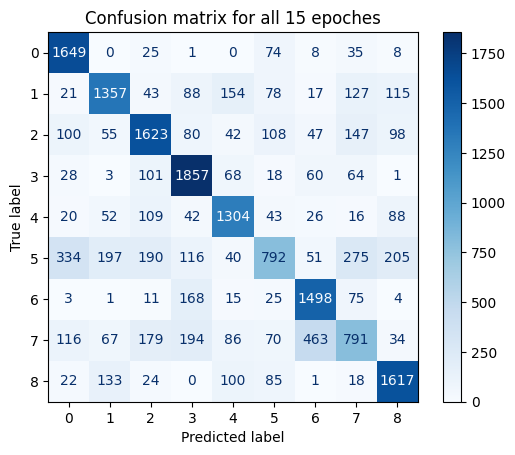

In [383]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions_test)
matrix = ConfusionMatrixDisplay(cm)
matrix.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion matrix for all {len(epoches)} epoches')
plt.show()



## **Classification Report**

In [384]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions_test)

print(report)


              precision    recall  f1-score   support

           0       0.72      0.92      0.81      1800
           1       0.73      0.68      0.70      2000
           2       0.70      0.71      0.70      2300
           3       0.73      0.84      0.78      2200
           4       0.72      0.77      0.74      1700
           5       0.61      0.36      0.45      2200
           6       0.69      0.83      0.75      1800
           7       0.51      0.40      0.45      2000
           8       0.75      0.81      0.78      2000

    accuracy                           0.69     18000
   macro avg       0.68      0.70      0.69     18000
weighted avg       0.68      0.69      0.68     18000



## **Visualising losses losses throughout epochs**

---



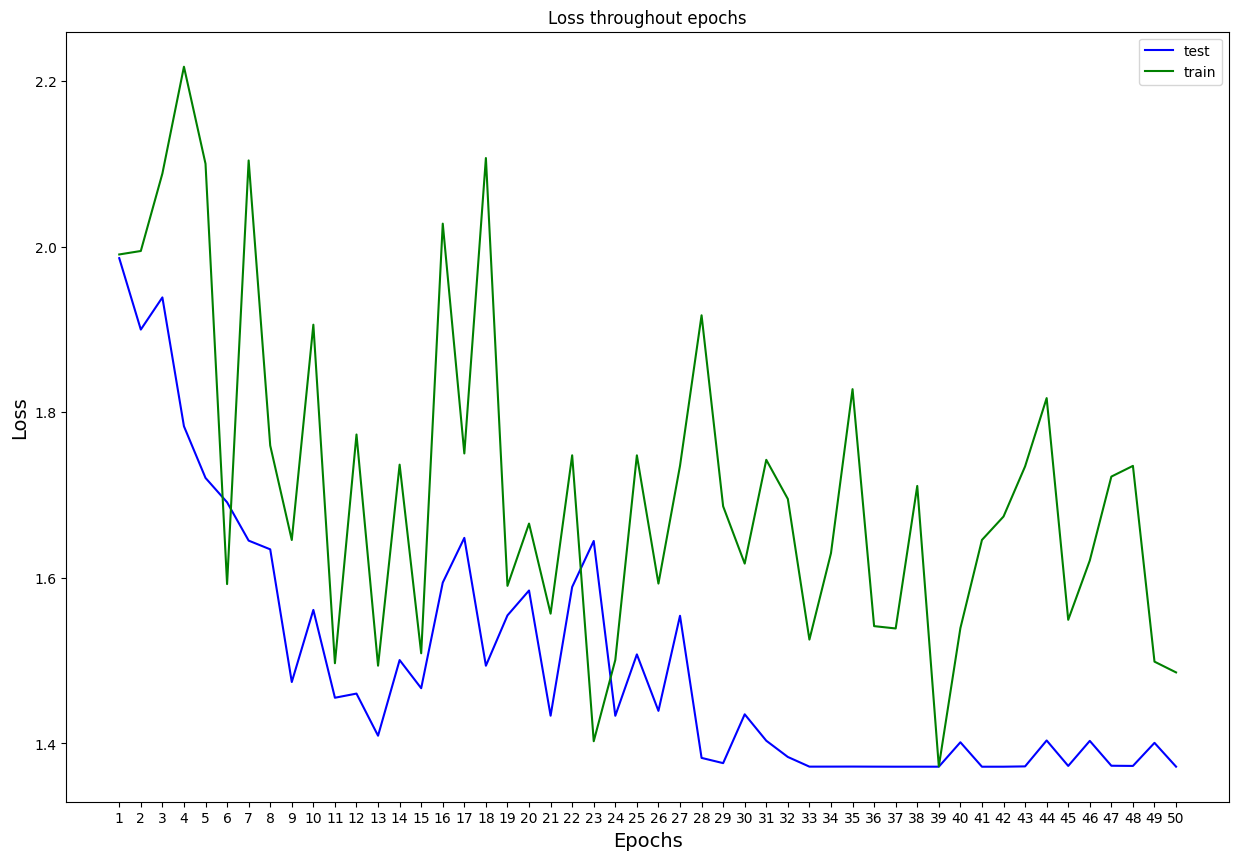

In [385]:

plt.figure(figsize=(15,10))
plt.plot(epochs, loss_training, 'b')
plt.plot(epochs, loss_testing, 'g')
plt.title("Loss throughout epochs")
plt.ylabel("Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.legend(['test','train'])
plt.yticks(fontsize=10)
plt.xticks(epochs, fontsize=10)
plt.show()


## **Visualing the accuracy throughout epochs during testing**

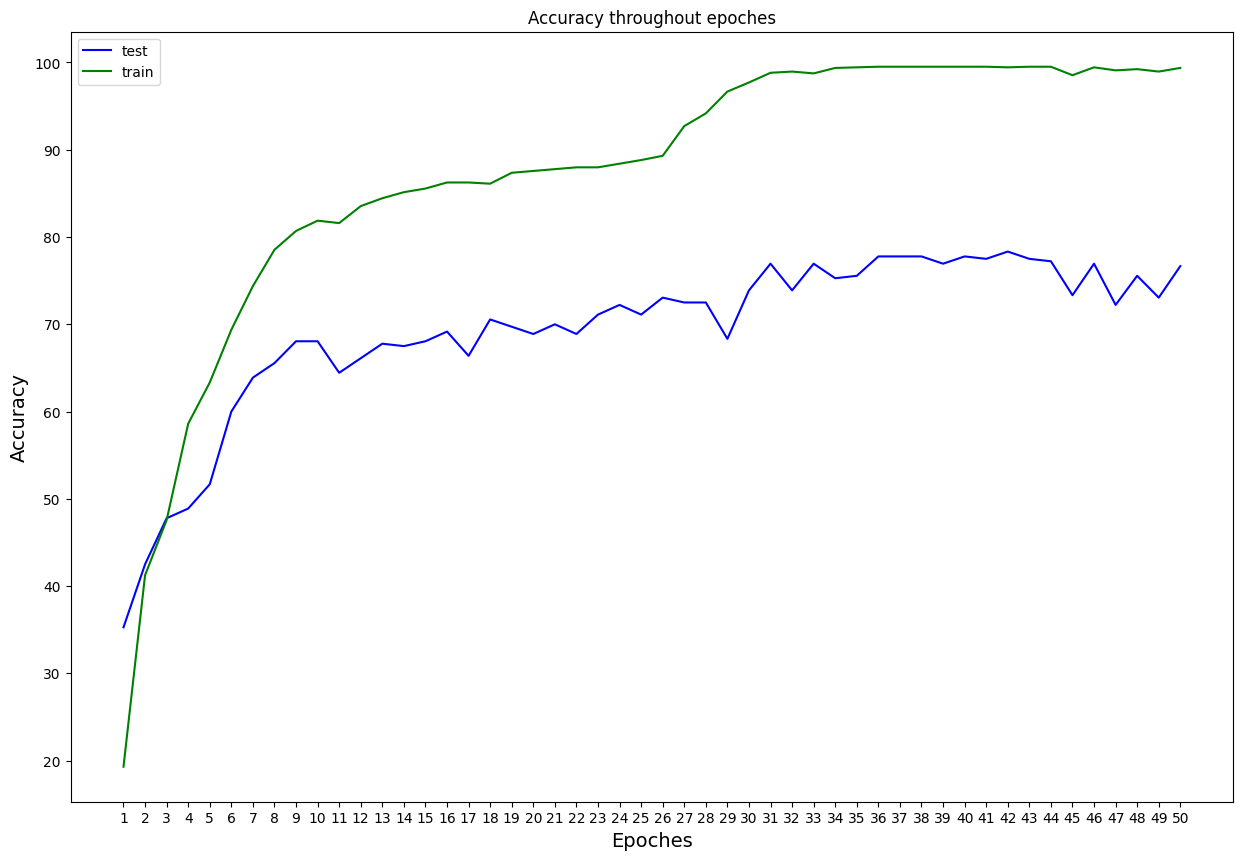

In [386]:

plt.figure(figsize=(15,10))
plt.plot(epochs, accuracy_testing, 'b')
plt.plot(epochs, accuracy_training, 'g')
plt.title("Accuracy throughout epoches")
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Epoches", fontsize=14)
plt.legend(['test','train'])
plt.yticks(fontsize=10)
plt.xticks(epochs, fontsize=10)
plt.show()

## **Learning rate visualisation throughout  epochs**

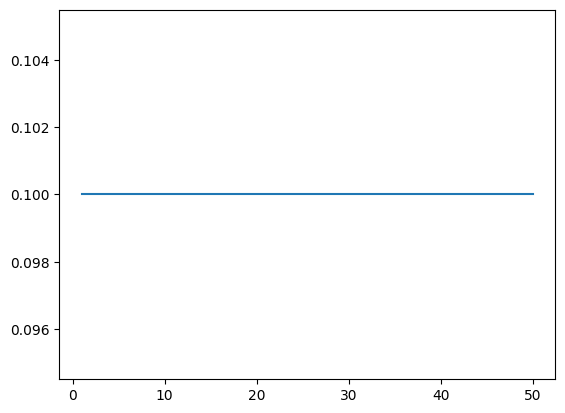

In [387]:

plt.plot(epochs, np.multiply(lr, 100))


## **Saving the model to the directory**

In [388]:
torch.save(model.state_dict(), '/root/.cache/model')

## **Loading the model**

In [389]:
model = CNN()
model.load_state_dict(torch.load('/root/.cache/model', weights_only=False))

<All keys matched successfully>

## **Making predictions with the trained model**

In [390]:

def predict(model, object, device):
  model.to(device)
  model.eval()
  img = Image.open(object)
  img_tensor = transform(img).unsqueeze(0).to(device)
  prediction = model(img_tensor)
  predicted_label = prediction.argmax(dim=1, keepdim=True)
  model.zero_grad()
  return predicted_label.item()


In [391]:
import random

to_predict = []

for x in range(len(full_path)):
  files = os.path.join(full_path[x], labels[x])
  files = os.listdir(files)
  random_file = random.choice(files)

  to_predict.append(os.path.join(full_path[x], labels[x], random_file))


In [396]:
accuracy = 0
predicted_labels = []
accurate_labels = []

for x in range(len(to_predict)):
  activations = []
  gradients = []
  prediction = predict(model, to_predict[x], device)
  prediction_string = labels[prediction]

  predicted_labels.append(prediction_string)
  if prediction_string == labels[x]:
    accuracy += 1
    accurate_labels.append(prediction_string)

print(f'The model accuracy for the random image for each label is: {round(100 * accuracy / len(to_predict),2)}%')

The model accuracy for the random image for each label is: 11.11%


## **Accuracy visualisation for predictions**

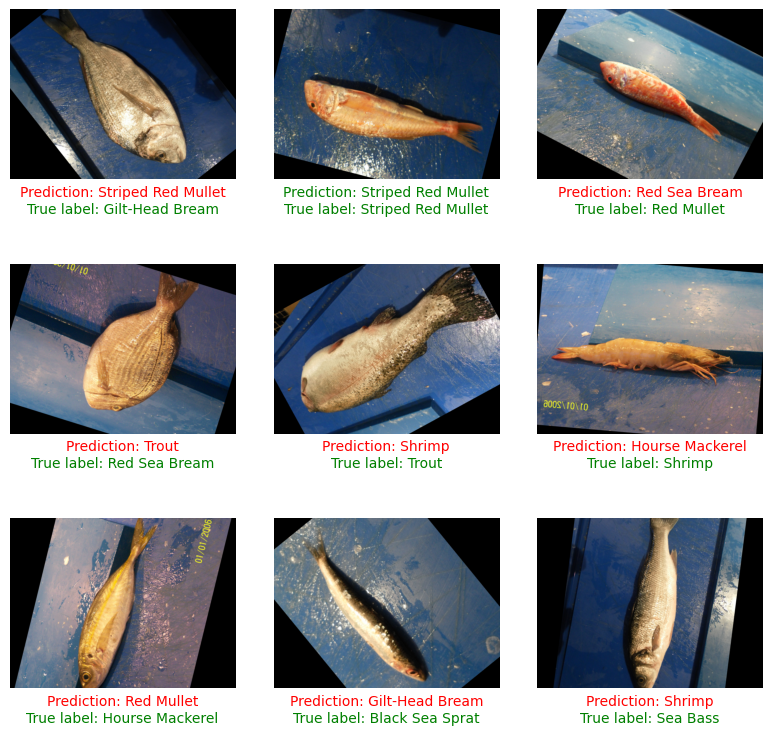

In [397]:
row = 3
column = 3
fig = plt.figure(figsize=(8,8))
for x in range(len(to_predict)):
  image = Image.open(to_predict[x])
  ax = fig.add_subplot(row,column,x + 1)

  plt.imshow(image)
  ax.axis('off')
  if labels[x] in accurate_labels:
    ax.text(0.5, -0.1, f'Prediction: {predicted_labels[x]}',
    color='green', fontsize=10, ha='center', transform=ax.transAxes)
  else:
    ax.text(0.5, -0.1, f'Prediction: {predicted_labels[x]}',
    color='red', fontsize=10, ha='center', transform=ax.transAxes)

  ax.text(0.5, -0.2, f'True label: {labels[x]}',
  color='green', fontsize=10, ha='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()